<center> <img src="https://impassivewealth.com/wp-content/uploads/2020/10/ActivePassive-768x241.png" align="center" width="960" height="480"/> </center>

<center><font color=#555555><font size=6> MAF1731 - Microstructure and Trading Systems </font> <br> <br>
    
<center><font color=#555555><font size=5> B.Eng Financial Engineering </font> <br> <br> <br> <br>

<center><font color=#555555><font size=6> I.F. Blas César Sánchez Barba </font> <br> <br>
   
<center> <font color= #555555> <font size = 4> Jun 2021 </a> | <font color= #555555> <font size = 4> Repository: <a href='https://github.com/if723286/Portafolio-Activo-Pasivo'>Link</a></font>

<hr style="border:0.02in solid gray"> </hr>

<center> <font color= #555555> <font size = 6> Lab 1 </font> <br> <br> <font color= #555555> <font size = 5> Active Investment vs Pasive Investment. Which one is better?  </font>

<hr style="border:0.02in solid gray"> </hr>

<br>

<font color= #555555> <font size = 4> Abstract </font>

<font color= #6B6B6B> <font size = 3>  Include here a description of the whole work, use no more than 400 words, you can use **Bold** and *Italic* highlights, also you can inclue [links](www.iteso.mx). Usually is a good strategy to generate this text at the very end of the process, since you have to include all aspects of the work, from a brief introduction, to problem definitions and methods used, to finally the results found. </font>

<br>

# <font color= #6B6B6B> <font size = 6> 1. Introduction </font>

<hr style="border:0.02in solid gray"> </hr>

This is an introduction, normally, it is done at the very end, when all the other content in the notebook is completed but just before the abstract (which is short version of the introduction) ... 

<br>

# <font color= #6B6B6B> 2. Install/Load Packages and Depedencies </font>

<hr style="border:0.02in solid gray"> </hr>

<br>

Finally, from the notebook it will be possible to acces other files within the mounted folder

### <font color= #6B6B6B> 2.1 Python Packages </font> <font color= #555555>

In order to run this notebook, it is necessary to have installed and/or have the _requirements.txt_ file with the following: 

- pandas>=1.1.1 
- numpy>=1.19.1
- jupyter>=1.0.0
- _Add any other here_

In [467]:
# Install all the pip packages in the requirements.txt
%%capture
import sys
!{sys.executable} -m pip install -r requirements.txt

UsageError: Line magic function `%%capture` not found.


### <font color= #6B6B6B> 2.2 Files Dependencies </font> <font color= #555555>

The following are the file dependencies that are needed to run this notebook:

- files/precios.csv : Precios históricos
- files/datos.txt : Otros datos históricos

<br>

# <font color= #6B6B6B> 3. Data Description </font>

<hr style="border:0.02in solid gray"> </hr>

Here we explain the data

### <font color= #6B6B6B> 3.1 Selection of stocks for portfolio </font> <font color= #555555>

We want to create our own portfolio. In order to do that is necesarry ti know which stocks are the most important ones in the NAFTRAC.

Since NAFRAC is a ETF that replies the S&P IPC 35, and the S&P IPC includes only the most strong enterprices in the Mexican market based in its level of capitalization, we need to obtain those stock that always appear in the NAFTRAC

First of all, lets get all the stocks that appered at lest once during the last two years

In [468]:
import pandas as pd
import os
import pandas as pd
import numpy as np
from scipy.optimize import minimize

In [469]:
# directory containing the csv files
directory = 'files'



columns = ['Ticker']
df_global = pd.DataFrame(columns=columns)

# loop through all the files in the directory
for filename in os.listdir(directory):
    # check if the file is a csv file
    if filename.endswith(".csv"):
        # read the csv file and store it in a data frame
        df = pd.read_csv(os.path.join(directory, filename), skiprows=2, nrows=37 , usecols=["Ticker", 'Peso (%)', 'Precio'])
        # append the data frame to the list
        df_global = pd.concat([df_global, df])      
df_global

,Ticker,Peso (%),Precio
0,AMXL,12.29,13.67
1,WALMEX*,11.14,58.35
2,GMEXICOB,10.57,87.84
3,FEMSAUBD,9.79,139.70
4,GFNORTEO,9.39,101.57
...,...,...,...
32,Q*,0.60,94.95
33,BOLSAA,0.56,39.53
34,VOLARA,0.56,21.35
35,MEGACPO,0.52,57.87


Now we want to obtain how many times each stock appear in the NAFTRAC

In [470]:
df_global['Ticker'] = df_global['Ticker'].map(lambda x: x.replace('*',''))
df_global['Ticker'] = df_global['Ticker'].map(lambda x: x.replace('.',''))
df_global['Ticker'] = df_global['Ticker'].apply(lambda x: "{}{}".format(x, '.MX'))

In [471]:
occurrences = df_global['Ticker'].value_counts()
occurrences

AMXL.MX          25
GFINBURO.MX      25
MXN.MX           25
ALSEA.MX         25
LIVEPOLC1.MX     25
BBAJIOO.MX       25
Q.MX             25
GCC.MX           25
VESTA.MX         25
BOLSAA.MX        25
MEGACPO.MX       25
GCARSOA1.MX      25
WALMEX.MX        25
PINFRA.MX        25
ALFAA.MX         25
PE&OLES.MX       25
CUERVO.MX        25
AC.MX            25
TLEVISACPO.MX    25
GMEXICOB.MX      25
FEMSAUBD.MX      25
GFNORTEO.MX      25
OMAB.MX          25
GAPB.MX          25
ELEKTRA.MX       25
CEMEXCPO.MX      25
ASURB.MX         25
GRUMAB.MX        25
BIMBOA.MX        25
KOFUBL.MX        25
ORBIA.MX         25
KIMBERA.MX       25
RA.MX            23
LABB.MX          20
 .MX             17
VOLARA.MX        17
SITESB1.MX       14
SITES1A-1.MX     11
GENTERA.MX        7
IENOVA.MX         4
LASITEB1.MX       4
NMKA.MX           2
USD.MX            1
LASITE.MX         1
Name: Ticker, dtype: int64

Then lets just select those stocks that appear all and every single time in the NAFTRAC

In [472]:
occurrences.head(33)

AMXL.MX          25
GFINBURO.MX      25
MXN.MX           25
ALSEA.MX         25
LIVEPOLC1.MX     25
BBAJIOO.MX       25
Q.MX             25
GCC.MX           25
VESTA.MX         25
BOLSAA.MX        25
MEGACPO.MX       25
GCARSOA1.MX      25
WALMEX.MX        25
PINFRA.MX        25
ALFAA.MX         25
PE&OLES.MX       25
CUERVO.MX        25
AC.MX            25
TLEVISACPO.MX    25
GMEXICOB.MX      25
FEMSAUBD.MX      25
GFNORTEO.MX      25
OMAB.MX          25
GAPB.MX          25
ELEKTRA.MX       25
CEMEXCPO.MX      25
ASURB.MX         25
GRUMAB.MX        25
BIMBOA.MX        25
KOFUBL.MX        25
ORBIA.MX         25
KIMBERA.MX       25
RA.MX            23
Name: Ticker, dtype: int64

In [473]:
df_global_list = df_global['Ticker'].value_counts(sort=True,ascending=False).index[:34].tolist()

In [474]:
df_global_list.remove('LIVEPOLC1.MX')
df_global_list.remove('MXN.MX')
df_global_list.append('LIVEPOLC-1.MX')

# <font color= #6B6B6B> 4. Pasive investment  </font>

<hr style="border:0.02in solid gray"> </hr>

In [475]:
p_portfolio = df_global.head(33)
p_portfolio['Precio'] = p_portfolio['Precio'].astype(str)
p_portfolio['Precio'] = p_portfolio['Precio'].map(lambda x: x.replace(',',''))
p_portfolio['Precio'] = p_portfolio['Precio'].astype(float)
p_portfolio['Peso (%)'] = p_portfolio['Peso (%)'].apply(lambda x: x/100)
p_portfolio


C:\Users\blas_\AppData\Local\Temp\ipykernel_14264\1688884738.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  p_portfolio['Precio'] = p_portfolio['Precio'].astype(str)
C:\Users\blas_\AppData\Local\Temp\ipykernel_14264\1688884738.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  p_portfolio['Precio'] = p_portfolio['Precio'].map(lambda x: x.replace(',',''))
C:\Users\blas_\AppData\Local\Temp\ipykernel_14264\1688884738.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a D

,Ticker,Peso (%),Precio
0,AMXL.MX,0.1229,13.67
1,WALMEX.MX,0.1114,58.35
2,GMEXICOB.MX,0.1057,87.84
3,FEMSAUBD.MX,0.0979,139.70
4,GFNORTEO.MX,0.0939,101.57
5,CEMEXCPO.MX,0.0671,11.76
6,GAPB.MX,0.0308,206.60
7,ELEKTRA.MX,0.0305,1386.01
8,TLEVISACPO.MX,0.0296,30.99
9,ASURB.MX,0.0243,322.53


In [476]:
p_portfolio = p_portfolio.sort_values('Ticker')
p_portfolio = p_portfolio.reset_index(drop=True)
p_portfolio

,Ticker,Peso (%),Precio
0,AC.MX,0.0155,93.07
1,ALFAA.MX,0.0136,12.90
2,AMXL.MX,0.1229,13.67
3,ASURB.MX,0.0243,322.53
4,BBAJIOO.MX,0.0067,24.76
5,BIMBOA.MX,0.0204,38.52
6,BOLSAA.MX,0.0082,46.00
7,CEMEXCPO.MX,0.0671,11.76
8,CUERVO.MX,0.0090,43.73
9,ELEKTRA.MX,0.0305,1386.01


In [477]:
p_portfolio['Value'] = p_portfolio['Peso (%)'] * 1000000
january_2021 = p_portfolio.Value.sum()

In [478]:
import yfinance as yf

tickers = df_global_list

data = yf.download(tickers = tickers, start= '2021-01-01', end='2023-02-01', interval = "1mo")

[*********************100%***********************]  33 of 33 completed


In [479]:
data = data['Adj Close']
data = data.transpose()
data

Date,2021-01-01,2021-02-01,2021-03-01,2021-04-01,2021-05-01,2021-06-01,2021-07-01,2021-08-01,2021-09-01,2021-10-01,...,2022-04-01,2022-05-01,2022-06-01,2022-07-01,2022-08-01,2022-09-01,2022-10-01,2022-11-01,2022-12-01,2023-01-01
AC.MX,84.994202,86.546692,92.099129,99.048798,105.987480,108.406502,112.944542,121.298637,118.026390,119.139778,...,123.938507,131.361862,130.095276,138.647202,134.660873,142.378235,158.922424,157.685303,158.039993,166.100006
ALFAA.MX,12.846219,11.342515,11.750805,14.110926,13.945353,14.922925,15.122429,14.065057,14.274536,14.873049,...,13.670000,15.120000,14.280000,14.010000,12.820000,12.800000,13.160000,13.500000,12.430000,13.630000
ALSEA.MX,23.110001,25.440001,30.280001,32.950001,33.410000,35.470001,40.369999,39.259998,41.610001,43.220001,...,44.730000,42.150002,38.080002,39.660000,36.560001,36.150002,38.060001,38.799999,36.779999,45.020000
AMXL.MX,13.036207,12.769189,13.312761,13.493952,14.857652,14.304543,15.906651,19.092947,17.634661,17.721577,...,19.389942,20.317455,20.063608,18.940828,16.763609,16.590000,18.700001,18.750000,17.600000,19.660000
ASURB.MX,301.710938,366.163452,339.596649,320.494781,339.830536,344.143005,338.268311,337.164490,360.868835,396.972107,...,425.827850,411.084473,395.230011,384.000000,426.709991,396.000000,464.970001,478.500000,454.010010,510.230011
BBAJIOO.MX,19.837048,19.252193,22.088346,25.733683,27.712582,30.464661,30.362431,32.747807,33.224880,32.926712,...,42.928249,41.360718,37.080383,44.099068,38.653378,50.990002,55.779999,62.689999,61.380001,75.639999
BIMBOA.MX,36.873363,37.620014,41.066132,38.807011,41.975513,43.077446,45.030609,49.879150,56.965485,59.811794,...,61.735508,63.521816,64.881554,71.501709,65.725197,70.241196,76.236069,81.258263,82.300003,93.489998
BOLSAA.MX,41.553852,38.708313,37.262962,40.596302,40.198833,41.468040,38.370453,39.286507,37.511059,37.246632,...,38.181576,34.234035,35.689999,37.939999,36.389999,33.799999,35.919998,38.090000,37.730000,40.889999
CEMEXCPO.MX,11.760000,13.940000,14.420000,16.090000,16.809999,16.820000,16.240000,16.500000,14.890000,13.240000,...,8.980000,9.260000,7.830000,8.230000,7.470000,6.960000,7.720000,8.820000,7.920000,10.020000
CUERVO.MX,42.955776,42.386051,45.932133,47.454693,49.301407,51.511574,48.928139,50.283703,44.411697,46.631290,...,50.406582,43.926163,43.103722,45.719669,40.824677,35.529999,41.959999,43.480000,42.549999,45.639999


In [480]:
data = data.reset_index(drop=True)
# Concatenate the two DataFrames
data

Date,2021-01-01,2021-02-01,2021-03-01,2021-04-01,2021-05-01,2021-06-01,2021-07-01,2021-08-01,2021-09-01,2021-10-01,...,2022-04-01,2022-05-01,2022-06-01,2022-07-01,2022-08-01,2022-09-01,2022-10-01,2022-11-01,2022-12-01,2023-01-01
0,84.994202,86.546692,92.099129,99.048798,105.987480,108.406502,112.944542,121.298637,118.026390,119.139778,...,123.938507,131.361862,130.095276,138.647202,134.660873,142.378235,158.922424,157.685303,158.039993,166.100006
1,12.846219,11.342515,11.750805,14.110926,13.945353,14.922925,15.122429,14.065057,14.274536,14.873049,...,13.670000,15.120000,14.280000,14.010000,12.820000,12.800000,13.160000,13.500000,12.430000,13.630000
2,23.110001,25.440001,30.280001,32.950001,33.410000,35.470001,40.369999,39.259998,41.610001,43.220001,...,44.730000,42.150002,38.080002,39.660000,36.560001,36.150002,38.060001,38.799999,36.779999,45.020000
3,13.036207,12.769189,13.312761,13.493952,14.857652,14.304543,15.906651,19.092947,17.634661,17.721577,...,19.389942,20.317455,20.063608,18.940828,16.763609,16.590000,18.700001,18.750000,17.600000,19.660000
4,301.710938,366.163452,339.596649,320.494781,339.830536,344.143005,338.268311,337.164490,360.868835,396.972107,...,425.827850,411.084473,395.230011,384.000000,426.709991,396.000000,464.970001,478.500000,454.010010,510.230011
5,19.837048,19.252193,22.088346,25.733683,27.712582,30.464661,30.362431,32.747807,33.224880,32.926712,...,42.928249,41.360718,37.080383,44.099068,38.653378,50.990002,55.779999,62.689999,61.380001,75.639999
6,36.873363,37.620014,41.066132,38.807011,41.975513,43.077446,45.030609,49.879150,56.965485,59.811794,...,61.735508,63.521816,64.881554,71.501709,65.725197,70.241196,76.236069,81.258263,82.300003,93.489998
7,41.553852,38.708313,37.262962,40.596302,40.198833,41.468040,38.370453,39.286507,37.511059,37.246632,...,38.181576,34.234035,35.689999,37.939999,36.389999,33.799999,35.919998,38.090000,37.730000,40.889999
8,11.760000,13.940000,14.420000,16.090000,16.809999,16.820000,16.240000,16.500000,14.890000,13.240000,...,8.980000,9.260000,7.830000,8.230000,7.470000,6.960000,7.720000,8.820000,7.920000,10.020000
9,42.955776,42.386051,45.932133,47.454693,49.301407,51.511574,48.928139,50.283703,44.411697,46.631290,...,50.406582,43.926163,43.103722,45.719669,40.824677,35.529999,41.959999,43.480000,42.549999,45.639999


In [481]:
data.insert(0, 'Peso (%)', p_portfolio['Peso (%)'])
data.insert(0, 'Ticker', p_portfolio['Ticker']) 

In [482]:
data = data.dropna()
data

Date,Ticker,Peso (%),2021-01-01 00:00:00,2021-02-01 00:00:00,2021-03-01 00:00:00,2021-04-01 00:00:00,2021-05-01 00:00:00,2021-06-01 00:00:00,2021-07-01 00:00:00,2021-08-01 00:00:00,...,2022-04-01 00:00:00,2022-05-01 00:00:00,2022-06-01 00:00:00,2022-07-01 00:00:00,2022-08-01 00:00:00,2022-09-01 00:00:00,2022-10-01 00:00:00,2022-11-01 00:00:00,2022-12-01 00:00:00,2023-01-01 00:00:00
0,AC.MX,0.0155,84.994202,86.546692,92.099129,99.048798,105.987480,108.406502,112.944542,121.298637,...,123.938507,131.361862,130.095276,138.647202,134.660873,142.378235,158.922424,157.685303,158.039993,166.100006
1,ALFAA.MX,0.0136,12.846219,11.342515,11.750805,14.110926,13.945353,14.922925,15.122429,14.065057,...,13.670000,15.120000,14.280000,14.010000,12.820000,12.800000,13.160000,13.500000,12.430000,13.630000
2,AMXL.MX,0.1229,23.110001,25.440001,30.280001,32.950001,33.410000,35.470001,40.369999,39.259998,...,44.730000,42.150002,38.080002,39.660000,36.560001,36.150002,38.060001,38.799999,36.779999,45.020000
3,ASURB.MX,0.0243,13.036207,12.769189,13.312761,13.493952,14.857652,14.304543,15.906651,19.092947,...,19.389942,20.317455,20.063608,18.940828,16.763609,16.590000,18.700001,18.750000,17.600000,19.660000
4,BBAJIOO.MX,0.0067,301.710938,366.163452,339.596649,320.494781,339.830536,344.143005,338.268311,337.164490,...,425.827850,411.084473,395.230011,384.000000,426.709991,396.000000,464.970001,478.500000,454.010010,510.230011
5,BIMBOA.MX,0.0204,19.837048,19.252193,22.088346,25.733683,27.712582,30.464661,30.362431,32.747807,...,42.928249,41.360718,37.080383,44.099068,38.653378,50.990002,55.779999,62.689999,61.380001,75.639999
6,BOLSAA.MX,0.0082,36.873363,37.620014,41.066132,38.807011,41.975513,43.077446,45.030609,49.879150,...,61.735508,63.521816,64.881554,71.501709,65.725197,70.241196,76.236069,81.258263,82.300003,93.489998
7,CEMEXCPO.MX,0.0671,41.553852,38.708313,37.262962,40.596302,40.198833,41.468040,38.370453,39.286507,...,38.181576,34.234035,35.689999,37.939999,36.389999,33.799999,35.919998,38.090000,37.730000,40.889999
8,CUERVO.MX,0.0090,11.760000,13.940000,14.420000,16.090000,16.809999,16.820000,16.240000,16.500000,...,8.980000,9.260000,7.830000,8.230000,7.470000,6.960000,7.720000,8.820000,7.920000,10.020000
9,ELEKTRA.MX,0.0305,42.955776,42.386051,45.932133,47.454693,49.301407,51.511574,48.928139,50.283703,...,50.406582,43.926163,43.103722,45.719669,40.824677,35.529999,41.959999,43.480000,42.549999,45.639999


In [483]:
primero = pd.DataFrame({'capital': [january_2021]})
primero

,capital
0,986700.0


In [484]:
results=[]
for j in range (0,24):
    suma = 0
    for i in range (0, 31):
        X = 0
        X = (data.iloc[i,j+3]/data.iloc[i,j+2]-1)*data.iloc[i,1]
        if X>0:
            suma += X
    results.append(suma)

In [485]:
df = pd.DataFrame (results, columns = ['rendimiento'])
df.loc[-1] = [0]  # adding a row
df.index = df.index + 1  # shifting index
df.sort_index(inplace=True) 
df

,rendimiento
0,0.000000
1,0.029507
2,0.060508
3,0.053473
4,0.059317
5,0.022559
6,0.026557
7,0.019913
8,0.011742
9,0.021734


In [486]:
import datetime
dates=[] 
# range of dates
date_range = pd.period_range(
    start='2021-01-01', periods=26, freq='M')
  
# timestamp range
timestamp_range = [x.to_timestamp() for x in date_range]
  
# iterating through timestamp range
for i in timestamp_range:
    dates.append(i)

df_pasiva = pd.DataFrame (dates, columns = ['timestamp'])

df_pasiva

,timestamp
0,2021-01-01
1,2021-02-01
2,2021-03-01
3,2021-04-01
4,2021-05-01
5,2021-06-01
6,2021-07-01
7,2021-08-01
8,2021-09-01
9,2021-10-01


In [487]:
df_pasiva.insert(1, 'capital', primero['capital'])
df_pasiva.insert(2, 'rendimiento', df['rendimiento'])

In [488]:
df_pasiva

,timestamp,capital,rendimiento
0,2021-01-01,986700.0,0.000000
1,2021-02-01,NaN,0.029507
2,2021-03-01,NaN,0.060508
3,2021-04-01,NaN,0.053473
4,2021-05-01,NaN,0.059317
5,2021-06-01,NaN,0.022559
6,2021-07-01,NaN,0.026557
7,2021-08-01,NaN,0.019913
8,2021-09-01,NaN,0.011742
9,2021-10-01,NaN,0.021734


In [489]:
df_pasiva.iloc[1,1] = df_pasiva.iloc[0,1] #la primera es la fila y la segunda es la columna

for i in range (0,23):
    df_pasiva.iloc[i+2,1] = df_pasiva.iloc[i+1,1]*(1 + df_pasiva.iloc[i+1,2])

    
#df_pasiva


In [490]:
df_pasiva

,timestamp,capital,rendimiento
0,2021-01-01,9.867000e+05,0.000000
1,2021-02-01,9.867000e+05,0.029507
2,2021-03-01,1.015815e+06,0.060508
3,2021-04-01,1.077280e+06,0.053473
4,2021-05-01,1.134885e+06,0.059317
5,2021-06-01,1.202203e+06,0.022559
6,2021-07-01,1.229324e+06,0.026557
7,2021-08-01,1.261971e+06,0.019913
8,2021-09-01,1.287102e+06,0.011742
9,2021-10-01,1.302214e+06,0.021734


In [491]:
acumulado=[]
for i in range(0,23):
    x  = df_pasiva.iloc[i+1,1]/df_pasiva.iloc[0,1]-1
    acumulado.append(x)
acumulado = pd.DataFrame (acumulado, columns = ['rendimiento acumulado'])
acumulado
    

,rendimiento acumulado
0,0.000000
1,0.029507
2,0.091801
3,0.150183
4,0.218408
5,0.245894
6,0.278982
7,0.304451
8,0.319767
9,0.348451


In [492]:
df_pasiva.insert(3, 'rendimiento acumulado', acumulado['rendimiento acumulado'])

In [493]:
df_pasiva = df_pasiva.dropna()
df_pasiva


,timestamp,capital,rendimiento,rendimiento acumulado
0,2021-01-01,9.867000e+05,0.000000,0.000000
1,2021-02-01,9.867000e+05,0.029507,0.029507
2,2021-03-01,1.015815e+06,0.060508,0.091801
3,2021-04-01,1.077280e+06,0.053473,0.150183
4,2021-05-01,1.134885e+06,0.059317,0.218408
5,2021-06-01,1.202203e+06,0.022559,0.245894
6,2021-07-01,1.229324e+06,0.026557,0.278982
7,2021-08-01,1.261971e+06,0.019913,0.304451
8,2021-09-01,1.287102e+06,0.011742,0.319767
9,2021-10-01,1.302214e+06,0.021734,0.348451


In [494]:
# DELETE THIS CELL IN YOUR FILE

# A particular process that is relevant for the work you are presenting.

<br>

# <font color= #6B6B6B> 5. Active investment  </font>

<hr style="border:0.02in solid gray"> </hr>

<br>

In [495]:
data = yf.download(tickers = tickers, start= '2021-01-01', end='2023-02-01', interval = "1mo")

[*********************100%***********************]  33 of 33 completed


In [496]:
data = data['Adj Close']
data

,AC.MX,ALFAA.MX,ALSEA.MX,AMXL.MX,ASURB.MX,BBAJIOO.MX,BIMBOA.MX,BOLSAA.MX,CEMEXCPO.MX,CUERVO.MX,...,MEGACPO.MX,OMAB.MX,ORBIA.MX,PE&OLES.MX,PINFRA.MX,Q.MX,RA.MX,TLEVISACPO.MX,VESTA.MX,WALMEX.MX
Date,,,,,,,,,,,,,,,,,,,,,
2021-01-01,84.994209,12.846219,23.110001,13.036207,301.710938,19.837048,36.873363,41.553852,11.760000,42.955780,...,68.090172,102.028107,41.945763,306.606842,137.593109,97.574570,72.374084,30.501726,38.437855,57.220539
2021-02-01,86.546684,11.342515,25.440001,12.769189,366.163483,19.252193,37.620018,38.708313,13.940000,42.386051,...,66.363106,102.340118,46.322632,287.015991,137.432358,103.072884,81.763901,30.639521,39.296021,58.524796
2021-03-01,92.099129,11.750805,30.280001,13.312761,339.596680,22.088345,41.066128,37.262962,14.420000,45.932133,...,67.281754,108.377975,51.810326,263.506958,139.647278,101.831909,82.782288,35.806805,42.609657,63.222080
2021-04-01,99.048798,14.110926,32.950001,13.493952,320.494781,25.733681,38.807011,40.596302,16.090000,47.454693,...,68.080978,106.219193,53.642719,260.748260,139.808044,99.694183,88.814896,49.468109,39.286060,65.026466
2021-05-01,105.987480,13.945353,33.410000,14.857652,339.830536,27.712582,41.975513,40.198833,16.809999,49.301407,...,69.734550,107.990067,54.069592,302.448792,142.621338,98.262993,92.758965,52.066521,40.851242,64.134071
2021-06-01,108.406509,14.922925,35.470001,14.304543,344.142975,30.464661,43.077446,41.468040,16.820000,51.511570,...,67.123840,109.895882,49.976746,275.031586,142.424866,87.319756,106.901932,56.507889,38.611046,63.810459
2021-07-01,112.944542,15.122429,40.369999,15.906651,338.268311,30.362431,45.030609,38.370453,16.240000,48.928135,...,66.419685,102.753319,51.999207,280.569000,134.092102,91.060280,111.899139,53.435726,38.929653,64.349815
2021-08-01,121.298645,14.065057,39.259998,19.092947,337.164490,32.747807,49.879150,39.286507,16.500000,50.283699,...,66.543381,102.230492,55.478024,284.457184,133.967056,89.518959,112.601303,52.464531,37.425865,70.076767
2021-09-01,118.026390,14.274536,41.610001,17.634661,360.868805,33.224880,56.965485,37.511059,14.890000,44.411697,...,60.044151,102.087128,51.191875,243.186447,127.786705,88.898666,108.333618,45.111172,36.061123,68.772514


In [497]:
ret1 = data.pct_change().dropna()
ret1.head()

,AC.MX,ALFAA.MX,ALSEA.MX,AMXL.MX,ASURB.MX,BBAJIOO.MX,BIMBOA.MX,BOLSAA.MX,CEMEXCPO.MX,CUERVO.MX,...,MEGACPO.MX,OMAB.MX,ORBIA.MX,PE&OLES.MX,PINFRA.MX,Q.MX,RA.MX,TLEVISACPO.MX,VESTA.MX,WALMEX.MX
Date,,,,,,,,,,,,,,,,,,,,,
2021-02-01,0.018266,-0.117054,0.100822,-0.020483,0.213623,-0.029483,0.020249,-0.068478,0.185374,-0.013263,...,-0.025364,0.003058,0.104346,-0.063896,-0.001168,0.056350,0.129740,0.004518,0.022326,0.022794
2021-03-01,0.064155,0.035996,0.190252,0.042569,-0.072554,0.147316,0.091603,-0.037340,0.034433,0.083662,...,0.013843,0.058998,0.118467,-0.081908,0.016116,-0.012040,0.012455,0.168648,0.084325,0.080261
2021-04-01,0.075459,0.200848,0.088177,0.013610,-0.056249,0.165034,-0.055012,0.089455,0.115811,0.033148,...,0.011879,-0.019919,0.035367,-0.010469,0.001151,-0.020993,0.072873,0.381528,-0.078001,0.028540
2021-05-01,0.070053,-0.011734,0.013961,0.101060,0.060331,0.076899,0.081648,-0.009791,0.044748,0.038915,...,0.024288,0.016672,0.007958,0.159926,0.020123,-0.014356,0.044408,0.052527,0.039841,-0.013724
2021-06-01,0.022824,0.070100,0.061658,-0.037227,0.012690,0.099308,0.026252,0.031573,0.000595,0.044830,...,-0.037438,0.017648,-0.075696,-0.090651,-0.001378,-0.111367,0.152470,0.085302,-0.054838,-0.005046


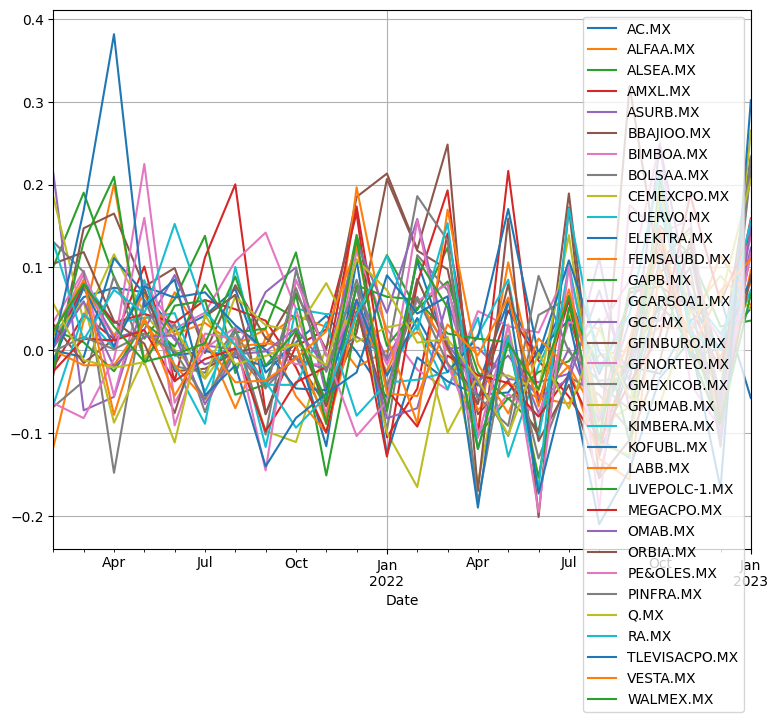

In [498]:
ret1.plot(figsize=(9,7),grid=True);

In [499]:
# Rendimientos esperados y volatilidad
tabla1 = pd.DataFrame(data={'Media1':ret1.mean(),
                            'Volatilidad1':ret1.std()
                            }, index=ret1.columns)
tabla1

,Media1,Volatilidad1
AC.MX,0.029317,0.046463
ALFAA.MX,0.004833,0.071145
ALSEA.MX,0.032245,0.093318
AMXL.MX,0.020863,0.088312
ASURB.MX,0.024904,0.078277
BBAJIOO.MX,0.063129,0.113782
BIMBOA.MX,0.041436,0.063820
BOLSAA.MX,0.001480,0.066976
CEMEXCPO.MX,-0.000655,0.112954
CUERVO.MX,0.005237,0.074816


In [500]:
cov1 = ret1.cov()
cov1

,AC.MX,ALFAA.MX,ALSEA.MX,AMXL.MX,ASURB.MX,BBAJIOO.MX,BIMBOA.MX,BOLSAA.MX,CEMEXCPO.MX,CUERVO.MX,...,MEGACPO.MX,OMAB.MX,ORBIA.MX,PE&OLES.MX,PINFRA.MX,Q.MX,RA.MX,TLEVISACPO.MX,VESTA.MX,WALMEX.MX
AC.MX,0.002159,0.001368,0.000815,0.001896,0.000003,0.002010,0.000309,0.001024,0.001934,0.001425,...,0.000192,0.001206,0.001617,0.003474,0.000778,-0.000963,0.001716,0.002793,0.001010,0.002135
ALFAA.MX,0.001368,0.005062,0.002438,0.001011,-0.001178,0.003437,-0.000116,0.001113,0.002790,0.000842,...,0.000924,0.001238,0.001819,0.002776,0.001254,-0.000611,0.001706,0.007656,0.000096,0.001492
ALSEA.MX,0.000815,0.002438,0.008708,0.002104,0.001740,0.006218,0.002067,0.001542,0.005126,0.001584,...,0.001956,0.002659,0.003993,0.002250,0.002484,0.002607,0.005565,0.009003,0.001494,0.003308
AMXL.MX,0.001896,0.001011,0.002104,0.007799,0.000678,0.001274,0.001836,0.001773,0.004887,0.002248,...,0.003518,0.001936,0.003753,0.003239,0.002341,0.000993,0.002173,0.004035,0.002906,0.003767
ASURB.MX,0.000003,-0.001178,0.001740,0.000678,0.006127,-0.001529,0.000916,0.000956,0.003044,0.001455,...,0.000584,0.003918,0.001360,0.000790,0.002694,0.001851,0.002198,-0.000425,0.001014,0.000861
BBAJIOO.MX,0.002010,0.003437,0.006218,0.001274,-0.001529,0.012946,0.002491,0.002213,0.004534,0.001505,...,0.002340,0.002264,0.002145,0.007787,0.002502,0.000473,0.006556,0.009182,0.001238,0.004325
BIMBOA.MX,0.000309,-0.000116,0.002067,0.001836,0.000916,0.002491,0.004073,0.000424,0.001892,0.001101,...,0.001925,0.001049,0.001456,0.001674,0.001742,0.000683,0.000904,0.000174,0.001979,0.001899
BOLSAA.MX,0.001024,0.001113,0.001542,0.001773,0.000956,0.002213,0.000424,0.004486,0.002016,0.002695,...,0.001995,0.002417,0.001467,0.001973,0.003431,0.000805,0.001850,0.003470,0.000429,0.002393
CEMEXCPO.MX,0.001934,0.002790,0.005126,0.004887,0.003044,0.004534,0.001892,0.002016,0.012759,0.003247,...,0.005583,0.003108,0.005540,0.004597,0.004245,0.002201,0.006874,0.010551,0.003750,0.003349
CUERVO.MX,0.001425,0.000842,0.001584,0.002248,0.001455,0.001505,0.001101,0.002695,0.003247,0.005597,...,0.002474,0.003082,0.002116,0.002599,0.003408,0.000325,0.002070,0.003760,0.001999,0.001721


In [501]:
corr1 = ret1.corr()
corr1

,AC.MX,ALFAA.MX,ALSEA.MX,AMXL.MX,ASURB.MX,BBAJIOO.MX,BIMBOA.MX,BOLSAA.MX,CEMEXCPO.MX,CUERVO.MX,...,MEGACPO.MX,OMAB.MX,ORBIA.MX,PE&OLES.MX,PINFRA.MX,Q.MX,RA.MX,TLEVISACPO.MX,VESTA.MX,WALMEX.MX
AC.MX,1.000000,0.413786,0.188071,0.461980,0.000716,0.380190,0.104065,0.328911,0.368426,0.409837,...,0.053545,0.322095,0.421285,0.648820,0.217568,-0.300758,0.385168,0.412940,0.331877,0.657520
ALFAA.MX,0.413786,1.000000,0.367210,0.160986,-0.211602,0.424551,-0.025549,0.233593,0.347241,0.158279,...,0.168055,0.215950,0.309559,0.338545,0.229019,-0.124661,0.250053,0.739380,0.020693,0.300018
ALSEA.MX,0.188071,0.367210,1.000000,0.255363,0.238187,0.585583,0.347026,0.246783,0.486342,0.226929,...,0.271359,0.353572,0.518100,0.209257,0.345833,0.405469,0.622012,0.662846,0.244351,0.507301
AMXL.MX,0.461980,0.160986,0.255363,1.000000,0.098077,0.126785,0.325843,0.299710,0.489926,0.340300,...,0.515711,0.272052,0.514548,0.318233,0.344311,0.163239,0.256633,0.313939,0.502176,0.610286
ASURB.MX,0.000716,-0.211602,0.238187,0.098077,1.000000,-0.171678,0.183324,0.182320,0.344276,0.248505,...,0.096562,0.621104,0.210309,0.087549,0.447052,0.343217,0.292822,-0.037282,0.197671,0.157309
BBAJIOO.MX,0.380190,0.424551,0.585583,0.126785,-0.171678,1.000000,0.343017,0.290372,0.352750,0.176736,...,0.266230,0.246864,0.228279,0.593884,0.285691,0.060373,0.600910,0.554424,0.166068,0.543867
BIMBOA.MX,0.104065,-0.025549,0.347026,0.325843,0.183324,0.343017,1.000000,0.099117,0.262469,0.230530,...,0.390427,0.204030,0.276249,0.227541,0.354661,0.155271,0.147813,0.018748,0.473304,0.425762
BOLSAA.MX,0.328911,0.233593,0.246783,0.299710,0.182320,0.290372,0.099117,1.000000,0.266467,0.537822,...,0.385485,0.447788,0.265234,0.255596,0.665460,0.174350,0.288018,0.355964,0.097713,0.511290
CEMEXCPO.MX,0.368426,0.347241,0.486342,0.489926,0.344276,0.352750,0.262469,0.266467,1.000000,0.384192,...,0.639848,0.341455,0.593824,0.353169,0.488134,0.282863,0.634696,0.641800,0.506755,0.424306
CUERVO.MX,0.409837,0.158279,0.226929,0.340300,0.248505,0.176736,0.230530,0.537822,0.384192,1.000000,...,0.428106,0.511183,0.342398,0.301410,0.591777,0.063082,0.288621,0.345331,0.407794,0.329239


In [502]:
#Tasa libre de riesgo
rf1 = 0.11 / 12
rf1

0.009166666666666667

In [503]:
# Construcción de parámetros
S1 = np.diag(tabla1.iloc[:,1])
Sigma1 = S1.dot(corr1).dot(S1)

Eind1 = tabla1.iloc[:,0]

# Función objetivo
def varianza(w, Sigma1):
    return w.T.dot(Sigma1).dot(w)

# Dato inicial
n1 = len(Eind1)
w01 = np.ones(n1) / n1
# Cotas de las variables
bnds1 = ((0, 1),) * n1
# Restricciones
cons1 = {'type': 'eq', 'fun': lambda w: w.sum() - 1}

# Portafolio de mínima varianza
minimavar1 = minimize(fun=varianza,
                   x0=w01,
                   args=(Sigma1,),
                   bounds=bnds1,
                   constraints=cons1
                  )
minimavar1

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: 0.0008745173153692892
       x: [ 1.921e-01  1.396e-01 ...  6.018e-05  8.945e-18]
     nit: 24
     jac: [ 1.458e-03  1.955e-03 ...  2.050e-03  2.595e-03]
    nfev: 816
    njev: 24

In [504]:
# Pesos, rendimiento, riesgo y Radio de Sharpe del portafolio de mínima varianza

w_minvar1 = minimavar1.x
E_minvar1 = Eind1.T.dot(w_minvar1)
s_minvar1 = varianza(w_minvar1, Sigma1)**0.5
RS_minvar1 = (E_minvar1 - rf1) / s_minvar1
w_minvar1, E_minvar1, s_minvar1, RS_minvar1

(array([1.92149706e-01, 1.39582487e-01, 2.11419424e-18, 0.00000000e+00,
        1.08407581e-01, 0.00000000e+00, 5.81707208e-02, 0.00000000e+00,
        0.00000000e+00, 1.73472348e-18, 1.25356995e-01, 0.00000000e+00,
        5.96311195e-19, 0.00000000e+00, 2.38524478e-18, 0.00000000e+00,
        3.63207728e-18, 1.62630326e-19, 1.67548699e-02, 3.23512840e-02,
        1.17165955e-01, 0.00000000e+00, 6.88468380e-18, 0.00000000e+00,
        0.00000000e+00, 1.46367293e-18, 1.13841228e-18, 0.00000000e+00,
        2.10000225e-01, 9.75781955e-19, 1.51788304e-18, 6.01752998e-05,
        8.94466792e-18]),
 0.01507194947240802,
 0.02957223893061344,
 0.1996900816200343)

Verificamos que los pesos sean correctos

In [505]:
w_minvar1.sum()

1.0

In [506]:
data = data.transpose()

In [507]:
len(w_minvar1)

33

In [508]:
data.insert(0, 'Peso (%)', w_minvar1)



In [509]:
data

Date,Peso (%),2021-01-01 00:00:00,2021-02-01 00:00:00,2021-03-01 00:00:00,2021-04-01 00:00:00,2021-05-01 00:00:00,2021-06-01 00:00:00,2021-07-01 00:00:00,2021-08-01 00:00:00,2021-09-01 00:00:00,...,2022-04-01 00:00:00,2022-05-01 00:00:00,2022-06-01 00:00:00,2022-07-01 00:00:00,2022-08-01 00:00:00,2022-09-01 00:00:00,2022-10-01 00:00:00,2022-11-01 00:00:00,2022-12-01 00:00:00,2023-01-01 00:00:00
AC.MX,1.921497e-01,84.994209,86.546684,92.099129,99.048798,105.987480,108.406509,112.944542,121.298645,118.026390,...,123.938515,131.361862,130.095276,138.647202,134.660873,142.378235,158.922424,157.685303,158.039993,166.100006
ALFAA.MX,1.395825e-01,12.846219,11.342515,11.750805,14.110926,13.945353,14.922925,15.122429,14.065057,14.274536,...,13.670000,15.120000,14.280000,14.010000,12.820000,12.800000,13.160000,13.500000,12.430000,13.630000
ALSEA.MX,2.114194e-18,23.110001,25.440001,30.280001,32.950001,33.410000,35.470001,40.369999,39.259998,41.610001,...,44.730000,42.150002,38.080002,39.660000,36.560001,36.150002,38.060001,38.799999,36.779999,45.020000
AMXL.MX,0.000000e+00,13.036207,12.769189,13.312761,13.493952,14.857652,14.304543,15.906651,19.092947,17.634661,...,19.389942,20.317455,20.063608,18.940828,16.763609,16.590000,18.700001,18.750000,17.600000,19.660000
ASURB.MX,1.084076e-01,301.710938,366.163483,339.596680,320.494781,339.830536,344.142975,338.268311,337.164490,360.868805,...,425.827850,411.084473,395.230011,384.000000,426.709991,396.000000,464.970001,478.500000,454.010010,510.230011
BBAJIOO.MX,0.000000e+00,19.837048,19.252193,22.088345,25.733681,27.712582,30.464661,30.362431,32.747807,33.224880,...,42.928249,41.360718,37.080383,44.099068,38.653378,50.990002,55.779999,62.689999,61.380001,75.639999
BIMBOA.MX,5.817072e-02,36.873363,37.620018,41.066128,38.807011,41.975513,43.077446,45.030609,49.879150,56.965485,...,61.735508,63.521816,64.881554,71.501709,65.725197,70.241196,76.236069,81.258263,82.300003,93.489998
BOLSAA.MX,0.000000e+00,41.553852,38.708313,37.262962,40.596302,40.198833,41.468040,38.370453,39.286507,37.511059,...,38.181576,34.234035,35.689999,37.939999,36.389999,33.799999,35.919998,38.090000,37.730000,40.889999
CEMEXCPO.MX,0.000000e+00,11.760000,13.940000,14.420000,16.090000,16.809999,16.820000,16.240000,16.500000,14.890000,...,8.980000,9.260000,7.830000,8.230000,7.470000,6.960000,7.720000,8.820000,7.920000,10.020000
CUERVO.MX,1.734723e-18,42.955780,42.386051,45.932133,47.454693,49.301407,51.511570,48.928135,50.283699,44.411697,...,50.406582,43.926163,43.103722,45.719669,40.824677,35.529999,41.959999,43.480000,42.549999,45.639999


In [510]:
suma=0
for i in range(0,33):
    x  = data.iloc[i,0]*1000000
    suma += x

suma

999999.9999999999

In [511]:
df_activa = pd.DataFrame (dates, columns = ['timestamp'])
w_minvar1
df_activa

,timestamp
0,2021-01-01
1,2021-02-01
2,2021-03-01
3,2021-04-01
4,2021-05-01
5,2021-06-01
6,2021-07-01
7,2021-08-01
8,2021-09-01
9,2021-10-01


In [512]:
ret1=ret1.transpose()
ret1.insert(0, 'Peso (%)', w_minvar1)
ret1

Date,Peso (%),2021-02-01 00:00:00,2021-03-01 00:00:00,2021-04-01 00:00:00,2021-05-01 00:00:00,2021-06-01 00:00:00,2021-07-01 00:00:00,2021-08-01 00:00:00,2021-09-01 00:00:00,2021-10-01 00:00:00,...,2022-04-01 00:00:00,2022-05-01 00:00:00,2022-06-01 00:00:00,2022-07-01 00:00:00,2022-08-01 00:00:00,2022-09-01 00:00:00,2022-10-01 00:00:00,2022-11-01 00:00:00,2022-12-01 00:00:00,2023-01-01 00:00:00
AC.MX,1.921497e-01,0.018266,0.064155,0.075459,0.070053,0.022824,0.041861,0.073966,-0.026977,0.009433,...,-0.042588,0.059895,-0.009642,0.065736,-0.028752,0.057310,0.116199,-0.007784,0.002249,0.051000
ALFAA.MX,1.395825e-01,-0.117054,0.035996,0.200848,-0.011734,0.070100,0.013369,-0.069921,0.014894,0.041929,...,-0.093053,0.106072,-0.055556,-0.018908,-0.084939,-0.001560,0.028125,0.025836,-0.079259,0.096541
ALSEA.MX,2.114194e-18,0.100822,0.190252,0.088177,0.013961,0.061658,0.138145,-0.027496,0.059857,0.038693,...,-0.102888,-0.057679,-0.096560,0.041492,-0.078164,-0.011214,0.052835,0.019443,-0.052062,0.224035
AMXL.MX,0.000000e+00,-0.020483,0.042569,0.013610,0.101060,-0.037227,0.112000,0.200312,-0.076378,0.004929,...,-0.059659,0.047835,-0.012494,-0.055961,-0.114948,-0.010356,0.127185,0.002674,-0.061333,0.117045
ASURB.MX,1.084076e-01,0.213623,-0.072554,-0.056249,0.060331,0.012690,-0.017070,-0.003263,0.070305,0.100046,...,0.003244,-0.034623,-0.038567,-0.028414,0.111224,-0.071969,0.174167,0.029099,-0.051181,0.123830
BBAJIOO.MX,0.000000e+00,-0.029483,0.147316,0.165034,0.076899,0.099308,-0.003356,0.078563,0.014568,-0.008974,...,-0.077275,-0.036515,-0.103488,0.189283,-0.123488,0.319160,0.093940,0.123880,-0.020896,0.232323
BIMBOA.MX,5.817072e-02,0.020249,0.091603,-0.055012,0.081648,0.026252,0.045341,0.107672,0.142070,0.049966,...,0.047286,0.028935,0.021406,0.102034,-0.080788,0.068710,0.085347,0.065877,0.012820,0.135966
BOLSAA.MX,0.000000e+00,-0.068478,-0.037340,0.089455,-0.009791,0.031573,-0.074698,0.023874,-0.045192,-0.007049,...,-0.038754,-0.103389,0.042530,0.063043,-0.040854,-0.071173,0.062722,0.060412,-0.009451,0.083753
CEMEXCPO.MX,0.000000e+00,0.185374,0.034433,0.115811,0.044748,0.000595,-0.034483,0.016010,-0.097576,-0.110813,...,-0.159963,0.031180,-0.154428,0.051086,-0.092345,-0.068273,0.109195,0.142487,-0.102041,0.265152
CUERVO.MX,1.734723e-18,-0.013263,0.083662,0.033148,0.038915,0.044830,-0.050153,0.027705,-0.116777,0.049978,...,0.039224,-0.128563,-0.018723,0.060690,-0.107065,-0.129693,0.180974,0.036225,-0.021389,0.072620


In [513]:
df = pd.DataFrame(ret1)
# Define the condition to filter the rows
condition = df['Peso (%)'] > 0.001

# Filter the DataFrame based on the condition
filtered_ret1 = df[condition]

filtered_ret1

Date,Peso (%),2021-02-01 00:00:00,2021-03-01 00:00:00,2021-04-01 00:00:00,2021-05-01 00:00:00,2021-06-01 00:00:00,2021-07-01 00:00:00,2021-08-01 00:00:00,2021-09-01 00:00:00,2021-10-01 00:00:00,...,2022-04-01 00:00:00,2022-05-01 00:00:00,2022-06-01 00:00:00,2022-07-01 00:00:00,2022-08-01 00:00:00,2022-09-01 00:00:00,2022-10-01 00:00:00,2022-11-01 00:00:00,2022-12-01 00:00:00,2023-01-01 00:00:00
AC.MX,0.192150,0.018266,0.064155,0.075459,0.070053,0.022824,0.041861,0.073966,-0.026977,0.009433,...,-0.042588,0.059895,-0.009642,0.065736,-0.028752,0.057310,0.116199,-0.007784,0.002249,0.051000
ALFAA.MX,0.139582,-0.117054,0.035996,0.200848,-0.011734,0.070100,0.013369,-0.069921,0.014894,0.041929,...,-0.093053,0.106072,-0.055556,-0.018908,-0.084939,-0.001560,0.028125,0.025836,-0.079259,0.096541
ASURB.MX,0.108408,0.213623,-0.072554,-0.056249,0.060331,0.012690,-0.017070,-0.003263,0.070305,0.100046,...,0.003244,-0.034623,-0.038567,-0.028414,0.111224,-0.071969,0.174167,0.029099,-0.051181,0.123830
BIMBOA.MX,0.058171,0.020249,0.091603,-0.055012,0.081648,0.026252,0.045341,0.107672,0.142070,0.049966,...,0.047286,0.028935,0.021406,0.102034,-0.080788,0.068710,0.085347,0.065877,0.012820,0.135966
ELEKTRA.MX,0.125357,-0.000123,-0.008342,0.111261,0.068194,-0.006447,-0.000854,-0.008335,-0.019471,0.007533,...,-0.053825,-0.050970,-0.000904,0.036703,-0.127669,-0.019684,-0.028282,0.035437,0.063120,-0.057693
GRUMAB.MX,0.016755,0.019225,0.058635,-0.087410,-0.009037,0.026585,-0.033347,0.064955,0.030213,0.023064,...,-0.031021,-0.030339,-0.048362,0.139025,-0.113117,-0.126406,0.192252,0.044653,0.089843,0.049132
KIMBERA.MX,0.032351,-0.065903,0.044245,0.002004,0.084614,-0.019407,-0.088776,0.100528,-0.041725,-0.041777,...,0.018227,0.085215,-0.106334,0.102461,-0.076816,-0.019421,0.166667,0.068025,0.019867,0.084064
KOFUBL.MX,0.117166,-0.012708,0.075407,0.004449,0.077018,0.063527,0.069973,0.030306,0.000430,-0.046166,...,0.015886,0.170535,-0.005814,0.108497,-0.001945,-0.047248,0.061861,0.058097,0.000228,0.086284
Q.MX,0.210000,0.056350,-0.012040,-0.020993,-0.014356,-0.111367,0.042837,-0.016926,-0.006929,0.008246,...,-0.035003,-0.102273,-0.003107,-0.070255,0.026041,-0.057671,-0.065168,0.044759,0.061430,0.206449


In [514]:
filtered_ret1['Peso (%)'].sum()

0.9999398247001728

In [515]:
p_portfolio['Value'] = p_portfolio['Peso (%)'] * 900000
january_2021 = p_portfolio.Value.sum()

Voy a invertir $900,000 al inicio para poder tener CASH y ser capaz de hacer rebalanceos ir haciendo rebalanceos mes a mes

In [516]:
primero = pd.DataFrame({'capital': [january_2021]})
primero
df_activa.insert(1, 'capital', primero['capital'])


In [536]:
for i in range(0,9):
        print(filtered_df.iloc[0,i+1])

0.018265835371044092
0.06415529684853882
0.07545857361114083
0.07005317301936054
0.022823726275088996
0.04186125498256121
0.07396641701793194
-0.026976909533616755
0.009433447571983722


In [541]:
# Create a list of values to filter by
values_to_filter = filtered_ret1.index.values

filtered_data = data[data.index.isin(values_to_filter)]
filtered_data

Date,Peso (%),2021-01-01 00:00:00,2021-02-01 00:00:00,2021-03-01 00:00:00,2021-04-01 00:00:00,2021-05-01 00:00:00,2021-06-01 00:00:00,2021-07-01 00:00:00,2021-08-01 00:00:00,2021-09-01 00:00:00,...,2022-04-01 00:00:00,2022-05-01 00:00:00,2022-06-01 00:00:00,2022-07-01 00:00:00,2022-08-01 00:00:00,2022-09-01 00:00:00,2022-10-01 00:00:00,2022-11-01 00:00:00,2022-12-01 00:00:00,2023-01-01 00:00:00
AC.MX,0.192150,84.994209,86.546684,92.099129,99.048798,105.987480,108.406509,112.944542,121.298645,118.026390,...,123.938515,131.361862,130.095276,138.647202,134.660873,142.378235,158.922424,157.685303,158.039993,166.100006
ALFAA.MX,0.139582,12.846219,11.342515,11.750805,14.110926,13.945353,14.922925,15.122429,14.065057,14.274536,...,13.670000,15.120000,14.280000,14.010000,12.820000,12.800000,13.160000,13.500000,12.430000,13.630000
ASURB.MX,0.108408,301.710938,366.163483,339.596680,320.494781,339.830536,344.142975,338.268311,337.164490,360.868805,...,425.827850,411.084473,395.230011,384.000000,426.709991,396.000000,464.970001,478.500000,454.010010,510.230011
BIMBOA.MX,0.058171,36.873363,37.620018,41.066128,38.807011,41.975513,43.077446,45.030609,49.879150,56.965485,...,61.735508,63.521816,64.881554,71.501709,65.725197,70.241196,76.236069,81.258263,82.300003,93.489998
ELEKTRA.MX,0.125357,1374.923828,1374.755127,1363.287598,1514.968140,1618.280273,1607.847534,1606.473755,1593.084473,1562.064941,...,1218.132690,1156.043945,1154.998657,1197.390015,1044.520020,1023.960022,995.000000,1030.260010,1095.290039,1032.099976
GRUMAB.MX,0.016755,213.853012,217.964371,230.744736,210.575241,208.672256,214.219803,207.076263,220.526886,227.189713,...,235.506363,228.361252,217.317184,247.529694,219.529999,191.779999,228.649994,238.860001,260.320007,273.109985
KIMBERA.MX,0.032351,32.110893,29.994678,31.321796,31.384563,34.040127,33.379517,30.416224,33.473892,32.077179,...,26.886698,29.177839,26.075239,28.746923,26.538698,26.023289,30.360502,32.425789,33.070000,35.849998
KOFUBL.MX,0.117166,74.030533,73.089745,78.601250,78.950920,85.031586,90.433411,96.761269,99.693680,99.736549,...,95.675163,111.991158,111.339996,123.419998,123.180000,117.360001,124.620003,131.860001,131.889999,143.270004
Q.MX,0.210000,97.574570,103.072884,101.831909,99.694183,98.262993,87.319756,91.060280,89.518959,88.898666,...,103.381470,92.808365,92.519997,86.019997,88.260002,83.169998,77.750000,81.230003,86.220001,104.019997


In [547]:
for j in range(0,24):  
    for i in range(0,9):
        if filtered_data.iloc[i,j+1] < -0.05:  #Row,Column
            filtered_data.iloc[i,1]= filtered_data.iloc[i,1]-0.025
        elif filtered_data.iloc[i,j+1] > 0.05:  #Row,Column
            filtered_data.iloc[i,1]= filtered_data.iloc[i,1]+0.025

filtered_data  #Este esta mal. Revisar!!!

C:\Users\blas_\AppData\Local\Temp\ipykernel_14264\737047653.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data.iloc[i,1]= filtered_data.iloc[i,1]+0.025


Date,Peso (%),2021-01-01 00:00:00,2021-02-01 00:00:00,2021-03-01 00:00:00,2021-04-01 00:00:00,2021-05-01 00:00:00,2021-06-01 00:00:00,2021-07-01 00:00:00,2021-08-01 00:00:00,2021-09-01 00:00:00,...,2022-04-01 00:00:00,2022-05-01 00:00:00,2022-06-01 00:00:00,2022-07-01 00:00:00,2022-08-01 00:00:00,2022-09-01 00:00:00,2022-10-01 00:00:00,2022-11-01 00:00:00,2022-12-01 00:00:00,2023-01-01 00:00:00
AC.MX,0.19215,86.794209,86.546684,92.099129,99.048798,105.987480,108.406509,112.944542,121.298645,118.026390,...,123.938515,131.361862,130.095276,138.647202,134.660873,142.378235,158.922424,157.685303,158.039993,166.100006
ALFAA.MX,0.46000,14.646219,11.342515,11.750805,14.110926,13.945353,14.922925,15.122429,14.065057,14.274536,...,13.670000,15.120000,14.280000,14.010000,12.820000,12.800000,13.160000,13.500000,12.430000,13.630000
ASURB.MX,0.46000,303.510937,366.163483,339.596680,320.494781,339.830536,344.142975,338.268311,337.164490,360.868805,...,425.827850,411.084473,395.230011,384.000000,426.709991,396.000000,464.970001,478.500000,454.010010,510.230011
BIMBOA.MX,0.46000,38.673363,37.620018,41.066128,38.807011,41.975513,43.077446,45.030609,49.879150,56.965485,...,61.735508,63.521816,64.881554,71.501709,65.725197,70.241196,76.236069,81.258263,82.300003,93.489998
ELEKTRA.MX,0.46000,1376.723828,1374.755127,1363.287598,1514.968140,1618.280273,1607.847534,1606.473755,1593.084473,1562.064941,...,1218.132690,1156.043945,1154.998657,1197.390015,1044.520020,1023.960022,995.000000,1030.260010,1095.290039,1032.099976
GRUMAB.MX,0.46000,215.653012,217.964371,230.744736,210.575241,208.672256,214.219803,207.076263,220.526886,227.189713,...,235.506363,228.361252,217.317184,247.529694,219.529999,191.779999,228.649994,238.860001,260.320007,273.109985
KIMBERA.MX,0.46000,33.910893,29.994678,31.321796,31.384563,34.040127,33.379517,30.416224,33.473892,32.077179,...,26.886698,29.177839,26.075239,28.746923,26.538698,26.023289,30.360502,32.425789,33.070000,35.849998
KOFUBL.MX,0.46000,75.830533,73.089745,78.601250,78.950920,85.031586,90.433411,96.761269,99.693680,99.736549,...,95.675163,111.991158,111.339996,123.419998,123.180000,117.360001,124.620003,131.860001,131.889999,143.270004
Q.MX,0.51000,99.374570,103.072884,101.831909,99.694183,98.262993,87.319756,91.060280,89.518959,88.898666,...,103.381470,92.808365,92.519997,86.019997,88.260002,83.169998,77.750000,81.230003,86.220001,104.019997


In [517]:
df_activa

,timestamp,capital
0,2021-01-01,888030.0
1,2021-02-01,NaN
2,2021-03-01,NaN
3,2021-04-01,NaN
4,2021-05-01,NaN
5,2021-06-01,NaN
6,2021-07-01,NaN
7,2021-08-01,NaN
8,2021-09-01,NaN
9,2021-10-01,NaN


In [526]:
df_activa['capital'].sum()

888030.0

# <font color= #6B6B6B> <font size = 6> 5. Results </font>

<hr style="border:0.02in solid gray"> </hr>

In [519]:
# DELETE THIS CELL IN YOUR FILE

# In here you present the general results, and also, a discussion of such results.

<br>

## <font color= #6B6B6B> 5.1 Results of first processes </font>

In [520]:
# DELETE THIS CELL IN YOUR FILE

# Separate your results according to the main processes you are working on

<br>

## <font color= #6B6B6B> 5.2 Results of another proces </font>

In [521]:
# DELETE THIS CELL IN YOUR FILE

# You can have several processes with which you are obtaining the results you need.

<br>

# <font color= #6B6B6B> <font size = 6> 6. References </font>

<hr style="border:0.02in solid gray"> </hr>

In [522]:
# DELETE THIS CELL IN YOUR FILE

# Citations, and other references you are using.

# DO INCLUDE THE FOLLOWING CITATION FOR THIS TEMPLATE

[1] Munnoz, 2020. Python project template. https://github.com/iffranciscome/python-project. (2021).

<br>

# <font color= red> TESTS (DO NOT INCLUDE IN THE FINAL NOTEBOOK) </font>

<hr style="border:0.02in solid red"> </hr>

Next are a series of tests to verify that everything is working ok. From correctly installed and loaded packages, to import other scripts, print plots with plotly

In [523]:
import pandas as pd
import data as dt

ModuleNotFoundError: No module named 'data'

In [ ]:
# -- TEST 1 : 
# verify that the script is being read
print(dt.dict_test)

In [ ]:
# -- TEST 2 :
# verify that installed pandas module works correctly
df_dict_test = pd.DataFrame(dt.dict_test, index=[0,1])
print(df_dict_test)

In [ ]:
# -- TEST 3 :
# verify you can use plotly and visualize plots in jupyter notebook

from plotly.offline import iplot   # print the plot inside jupyter and offline
import plotly.graph_objects as go  # functions to create plots

# example data
df = pd.DataFrame({'column_a': [1, 2, 3, 4, 5], 'column_b': [1, 2, 3, 4, 5]})
# basic plotly plot
data = [go.Bar(x=df['column_a'], y=df['column_b'])]

# instruction to view it inside jupyter
iplot(data)

In [ ]:
# -- TEST 4 :
# verify you can use plotly and visualize plots in web browser locally

import plotly.io as pio            # to define input-output of plots
pio.renderers.default = "browser"  # to render the plot locally in your default web browser

# basic plotly plot
plot_data = go.Figure(go.Bar(x=df['column_a'], y=df['column_b']))

# instruction to view it in specified render (in this case browser)
plot_data.show()